### Import des librairies utiles pour le traitement des données

In [53]:
import pandas as pd
import datetime
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

# Selection des Datasets

Dataset de train et cross validation : 3, 5. C'est deux datasets contiennent du port scanning, or notre algorithme est concu pour détecter ce type d'attaque. De plus, ils sont labelisé pour pouvoir entrainer nos données


Dataset de test : 6, 8 . Ces datasets contiennent du seulement du port scanning

## Étude du dataset 6

### Ouverture du Dataset 6

In [54]:
df6 = pd.read_csv(r"..\Data\CTU-13-Dataset\6\capture20110816.binetflow", sep=",")
print(df6.shape)
df6.head()

(558919, 15)


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/16 10:04:03.820235,0.286751,tcp,67.210.234.162,3597,->,147.32.86.98,80,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt
1,2011/08/16 10:04:04.106986,0.280358,tcp,67.210.234.162,3597,->,147.32.86.98,80,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt
2,2011/08/16 10:04:04.387344,0.280039,tcp,67.210.234.162,3597,->,147.32.86.98,80,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt
3,2011/08/16 10:02:54.155092,138.123184,tcp,147.32.84.59,49158,->,147.32.80.7,80,SRPA_FSPA,0.0,0.0,12,2636,638,flow=Background-Established-cmpgw-CVUT
4,2011/08/16 10:07:24.648890,0.306994,tcp,67.210.234.171,3255,->,147.32.84.142,80,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt


Modifier le format de la colonne "StartTime" en datetime.

In [55]:
def strdate_to_datetime(df):
    df["StartTime"] = pd.to_datetime(df["StartTime"], format='mixed')
    return df

In [56]:
df6 = strdate_to_datetime(df6)

Afficher le nombre d'adresses IP source et destination distinctes dans le dataset 

In [57]:
def affichage_IP_addresses(df):
    source_IP = df["SrcAddr"].value_counts()
    dest_IP = df["DstAddr"].value_counts()
    return source_IP, dest_IP

In [58]:
source_IP, dest_IP = affichage_IP_addresses(df6)
print(len(source_IP), len(dest_IP))

72345 42434


Afficher les valeurs min, max de la colonne "StartTime" et la durée d'acquision des flux du dataset

In [59]:
def get_start_time_values(df):
    max = df["StartTime"].max()
    min = df["StartTime"].min()
    return max, min, max - min

In [60]:
max, min, dur = get_start_time_values(df6)
print(min, max, dur)

2011-08-16 10:01:46.972101 2011-08-16 12:10:56.805092 0 days 02:09:09.832991


Afficher les durées max, min, et moyenne des flux dans le dataset

In [61]:
def get_dur_values(df):
    min = df["Dur"].min()
    max = df["Dur"].max()
    moy = df["Dur"].mean()
    return min, max, moy

In [62]:
min, max, moy = get_dur_values(df6)
print(min, max, moy)

0.0 3600.0 244.2579428383092


Afficher les différentes valeurs prise par la colonne "Proto"

In [63]:
def get_proto_values(df):
    proto_values = df["Proto"].value_counts()
    return proto_values

In [64]:
proto_values = get_proto_values(df6)
print(proto_values)

Proto
udp          421045
tcp          128447
icmp           7950
igmp            628
rtp             349
rtcp            266
arp             195
ipv6-icmp        21
esp               7
ipx/spx           5
pim               3
ipv6              2
udt               1
Name: count, dtype: int64


Afficher le nombre total de ports source distincts dans le dataset 

In [65]:
def get_Sport_values(df):
    Sport_values = df["Sport"].value_counts()
    return Sport_values

In [66]:
Sport_values = get_Sport_values(df6)
print(Sport_values)
print(len(Sport_values))

Sport
13363     30036
7103       9136
0x0303     2758
80         2298
7525       2045
          ...  
26878         1
12670         1
6036          1
10760         1
16846         1
Name: count, Length: 57515, dtype: int64
57515


Afficher le nombre total de ports destination distincts dans le dataset 

In [67]:
def get_Dport_values(df):
    Dport_values = df["Dport"].value_counts()
    return Dport_values

In [68]:
Dport_values = get_Dport_values(df6)
print(Dport_values)
print(len(Dport_values))

Dport
53        269488
13363      87452
80         84556
443        18393
25          4821
           ...  
41584          1
6022           1
7821           1
0x54d9         1
0x926f         1
Name: count, Length: 30361, dtype: int64
30361


Afficher les différentes valeurs prise par la colonne "Label" dans le dataset et leur répartition.

In [69]:
def hist_of_label_values(df):
    label_values = df['Label'].value_counts()
    print(label_values)
    print(len(label_values))
    total_traffic = 0
    background_count = 0
    normal_count = 0
    botnet_count = 0
    for label_index in label_values.index:
        if "Background" in label_index:
            background_count += label_values[label_index]
        elif "Normal" in label_index:
            normal_count += label_values[label_index]
        elif "Botnet" in label_index:
            botnet_count += label_values[label_index]
        total_traffic += label_values[label_index]

    label_repartition = {"Background traffic": background_count, "Normal traffic": normal_count, "Botnet traffic": botnet_count}

    print(label_repartition)

    plt.bar(label_repartition.keys(),label_repartition.values(), color='g')
    plt.show()
    
    percentage_of_traffic = {}
    for key in label_repartition:
        percentage_of_traffic[key] = f"{np.round((label_repartition[key]/total_traffic)*100, 2)}%"
    
    print(percentage_of_traffic)

Label
flow=To-Background-UDP-CVUT-DNS-Server             261525
flow=Background-UDP-Established                    128117
flow=Background-TCP-Established                     66424
flow=Background-Established-cmpgw-CVUT              40960
flow=Background-UDP-Attempt                         14608
flow=Background                                     11632
flow=To-Background-CVUT-Proxy                        8444
flow=From-Normal-V47-Stribrek                        5488
flow=From-Botnet-V47-TCP-Attempt-SPAM                4398
flow=Background-TCP-Attempt                          4179
flow=Background-Attempt-cmpgw-CVUT                   3616
flow=From-Normal-V47-Grill                           1245
flow=To-Background-CVUT-WebServer                    1034
flow=Background-UDP-NTP-Established-1                 887
flow=From-Normal-V47-Jist                             682
flow=From-Background-CVUT-Proxy                       451
flow=Background-google-analytics2                     323
flow=Bac

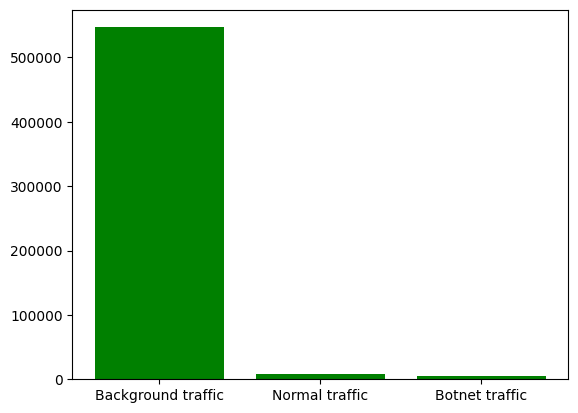

{'Background traffic': '97.83%', 'Normal traffic': '1.34%', 'Botnet traffic': '0.83%'}


In [70]:
hist_of_label_values(df6)

## Étude du dataset 8

### Ouverture du Dataset 8

In [71]:
df8 = pd.read_csv(r"..\Data\CTU-13-Dataset\8\capture20110816-3.binetflow", sep=",")

print(df8.shape)
df8.head()

(2954230, 15)


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/16 14:23:17.316620,0.983988,tcp,147.32.3.51,4519,->,147.32.84.46,10010,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt
1,2011/08/16 14:25:13.585599,0.909895,tcp,147.32.84.59,61591,->,199.59.149.200,443,SR_A,0.0,0.0,3,204,138,flow=Background-Established-cmpgw-CVUT
2,2011/08/16 14:26:27.614070,3.067423,tcp,217.129.160.86,2228,->,147.32.84.229,13363,SR_SA,0.0,0.0,3,184,122,flow=Background-TCP-Established
3,2011/08/16 14:26:29.245037,2.856905,tcp,217.129.160.86,2231,->,147.32.84.229,443,SR_SA,0.0,0.0,3,184,122,flow=Background-TCP-Established
4,2011/08/16 14:26:30.868242,2.985940,tcp,217.129.160.86,2234,->,147.32.84.229,80,SR_SA,0.0,0.0,3,184,122,flow=Background-TCP-Established


Modififer le format de la colonne "StartTime" en datetime

In [72]:
df8 = strdate_to_datetime(df8)

Afficher le nombre d'adresses IP source et destination distinctes dans le dataset 

In [73]:
source_IP, dest_IP = affichage_IP_addresses(df8)
print(source_IP,dest_IP)
print(len(source_IP), len(dest_IP))

SrcAddr
147.32.84.138     635712
147.32.84.59      278512
147.32.84.229     177898
147.32.85.25      148141
147.32.86.20      113813
                   ...  
94.66.160.156          1
66.87.118.63           1
189.15.152.211         1
83.205.245.21          1
72.225.154.183         1
Name: count, Length: 333816, dtype: int64 DstAddr
147.32.80.9       1374364
147.32.84.229      736363
188.138.84.239      27677
147.32.80.13        23905
195.113.0.43        18899
                   ...   
207.68.230.56           1
89.245.109.179          1
72.139.0.216            1
24.15.63.161            1
222.13.210.74           1
Name: count, Length: 97822, dtype: int64
333816 97822


Afficher les valeurs min, max de la colonne "StartTime" et la durée d'acquision des flux du dataset

In [74]:
max, min, dur = get_start_time_values(df8)
print(min, max, dur)

2011-08-16 14:18:55.889839 2011-08-17 09:47:11.231725 0 days 19:28:15.341886


Afficher les différentes valeurs prise par la colonne "Label" dans le dataset et leur répartition.

Label
flow=To-Background-UDP-CVUT-DNS-Server                                          1331472
flow=Background-UDP-Established                                                  875967
flow=Background-TCP-Established                                                  316366
flow=Background-Established-cmpgw-CVUT                                           106864
flow=Background-UDP-Attempt                                                       70708
flow=Background                                                                   60003
flow=Background-TCP-Attempt                                                       56007
flow=From-Normal-V49-Stribrek                                                     48588
flow=To-Background-CVUT-Proxy                                                     23886
flow=From-Normal-V49-Grill                                                        18164
flow=Background-Attempt-cmpgw-CVUT                                                 8030
flow=To-Background-CVUT-We

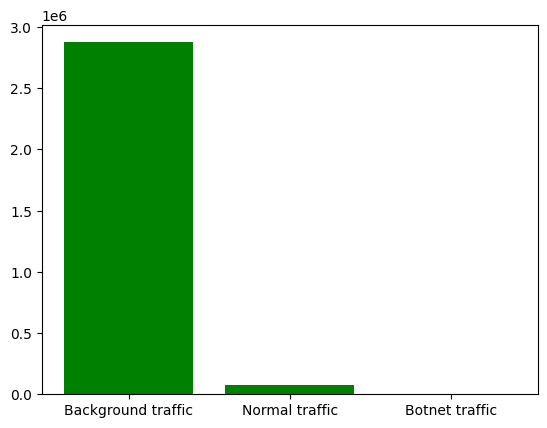

{'Background traffic': '97.33%', 'Normal traffic': '2.47%', 'Botnet traffic': '0.21%'}


In [75]:
hist_of_label_values(df8)

## Création des datasets de train et de test

### Division des datasets entre les flow produit par le botnet et ceux produit par les utilisateurs normaux et le background

Fonction permettant de séparer le traffic produit par le botnet du traffic normal et background

In [76]:
def separate_botnet(df):
    label_values  = df["Label"].values
    label_botnet = []
    df_botnet = pd.DataFrame()
    df_normal_background = pd.DataFrame()
    label_background_normal = []
    for label_value in label_values:
        if 'Botnet' in label_value:
            label_botnet.append(label_value)
        else:
            label_background_normal.append(label_value)
    label_botnet = set(label_botnet)
    label_background_normal = set(label_background_normal)
    for label in label_botnet:
        df_botnet_part = df[df['Label'] == label]
        df_botnet = pd.concat([df_botnet, df_botnet_part])
    for label in label_background_normal:
        df_normal_background_part = df[df['Label'] == label]
        df_normal_background = pd.concat([df_normal_background, df_normal_background_part])
    return df_botnet, df_normal_background

Séparer le traffic pour le dataset 6

In [77]:
df_botnet6, df_normal_background6 = separate_botnet(df6)

In [78]:
print(df_botnet6.shape)
df_botnet6.head()

(4630, 15)


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
221183,2011-08-16 10:50:25.183793,9.013207,tcp,147.32.84.165,2974,->,192.168.88.148,2869,S_,0.0,NaN,3,186,186,flow=From-Botnet-V47-TCP-Attempt
488879,2011-08-16 11:53:24.272627,0.000000,udp,147.32.84.165,123,->,65.55.56.40,123,INT,0.0,NaN,1,90,90,flow=From-Botnet-V47-UDP-Attempt
108816,2011-08-16 10:26:51.686433,60.003040,tcp,147.32.84.165,1123,->,195.113.232.90,80,SRPA_SPA,0.0,0.0,8,1687,500,flow=From-Botnet-V47-TCP-Established-HTTP-Ad-62
2935,2011-08-16 10:02:08.872739,500.003357,tcp,147.32.84.165,1039,->,195.113.232.73,80,SPA_FSPA,0.0,0.0,14,5498,531,flow=From-Botnet-V47-TCP-Established-HTTP-Ad-4
39074,2011-08-16 10:09:58.055700,1.896288,tcp,147.32.84.165,1040,->,91.212.135.158,5678,FSPA_FSPA,0.0,0.0,1417,1255401,32823,flow=From-Botnet-V47-TCP-CC73-Not-Encrypted


In [79]:
print(df_normal_background6.shape)
df_normal_background6.head()

(554289, 15)


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
3072,2011-08-16 10:02:10.438779,3583.526611,udp,147.32.86.96,56432,<->,82.208.56.89,123,CON,0.0,0.0,226,20340,10170,flow=To-Normal-V47-UDP-NTP-server
8349,2011-08-16 10:03:03.354191,3415.070312,udp,147.32.84.13,57826,<->,82.208.56.89,123,CON,0.0,0.0,78,7020,3510,flow=To-Normal-V47-UDP-NTP-server
13496,2011-08-16 10:04:02.535378,3508.265381,udp,147.32.84.15,32856,<->,82.208.56.89,123,CON,0.0,0.0,24,2160,1080,flow=To-Normal-V47-UDP-NTP-server
15608,2011-08-16 10:04:30.724439,3513.515381,udp,147.32.84.8,57389,<->,82.208.56.89,123,CON,0.0,0.0,42,3780,1890,flow=To-Normal-V47-UDP-NTP-server
22714,2011-08-16 10:06:07.973361,3426.579346,udp,147.32.84.25,40996,<->,82.208.56.89,123,CON,0.0,0.0,76,6840,3420,flow=To-Normal-V47-UDP-NTP-server


Répartition temporelle du trafic du botnet dans le dataframe 

In [80]:
max, min, dur = get_start_time_values(df_botnet6)
print(min, max, dur)

2011-08-16 10:02:08.703460 2011-08-16 12:10:15.643807 0 days 02:08:06.940347


Séparation du traffic pour le dataset 8 

In [81]:
df_botnet8, df_normal_background8 = separate_botnet(df8)

In [82]:
print(df_botnet8.shape)
df_botnet8.head()

(6127, 15)


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
16008,2011-08-16 14:21:14.553769,8.978836,tcp,147.32.84.165,1038,->,169.254.197.200,2869,S_,0.0,NaN,3,186,186,flow=From-Botnet-V49-TCP-Attempt
17142,2011-08-16 14:21:24.845099,9.001941,tcp,147.32.84.165,1039,->,192.168.88.148,2869,S_,0.0,NaN,3,186,186,flow=From-Botnet-V49-TCP-Attempt
62008,2011-08-16 14:29:21.421960,6.008705,tcp,147.32.84.165,1066,->,202.96.209.5,80,S_,0.0,0.0,2,124,124,flow=From-Botnet-V49-TCP-Attempt
154513,2011-08-16 14:47:41.667027,0.000000,tcp,147.32.84.165,1105,->,192.168.0.1,135,S_,0.0,NaN,1,62,62,flow=From-Botnet-V49-TCP-Attempt
154515,2011-08-16 14:47:41.678422,0.000000,tcp,147.32.84.165,1106,->,147.32.79.1,135,S_,0.0,NaN,1,62,62,flow=From-Botnet-V49-TCP-Attempt


In [83]:
print(df_normal_background8.shape)
df_normal_background8.head()

(2948103, 15)


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
341,2011-08-16 14:18:56.645840,0.000328,udp,147.32.84.170,39364,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Normal-V49-Stribrek
342,2011-08-16 14:18:56.646714,0.000410,udp,147.32.84.170,35349,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Normal-V49-Stribrek
343,2011-08-16 14:18:56.647854,0.017853,tcp,147.32.84.170,49026,->,209.85.148.106,80,FSA_FSA,0.0,0.0,7,478,272,flow=From-Normal-V49-Stribrek
665,2011-08-16 14:18:59.071166,205.010361,tcp,147.32.84.170,47582,<?>,209.85.148.106,443,RA_FPA,0.0,0.0,17,1220,594,flow=From-Normal-V49-Stribrek
666,2011-08-16 14:18:59.071174,195.009506,tcp,147.32.84.170,47583,<?>,209.85.148.106,443,RA_FPA,0.0,0.0,16,1154,528,flow=From-Normal-V49-Stribrek


Répartition temporelle du trafic du botnet dans le dataframe 

In [84]:
max, min, dur = get_start_time_values(df_botnet8)
print(min, max, dur)

2011-08-16 14:19:01.438016 2011-08-17 09:46:41.947106 0 days 19:27:40.509090


## Edition, formattage et sauvegarde des datasets pour l'exploitation

Fonction pour calculer le temps de fin 'EndTime' pour chaque flow 

In [85]:
def compute_end_time(row):
    row["EndTime"] = datetime.datetime.utcfromtimestamp(row["StartTime"].timestamp()+row["Dur"])
    return row

Calcul et ajout de la colonne "EndTime" (Temps de fin du flux) sur le dataset 6

In [ ]:
df6_test = df6.apply(compute_end_time, axis=1).reset_index(drop = True)

Calcul et ajout de la colonne "EndTime" (Temps de fin du flux) sur le dataset 8

In [ ]:
df8_train = df8.apply(compute_end_time, axis=1).reset_index(drop = True)

Sauvegarde du dataset 6 modifier avec la colonne "EndTime"

In [ ]:
df6_test.to_csv("..\Data\Dataset_prepared\dataset6_test.csv", index=False)

Sauvegarde du dataset 8 modifier avec la colonne "EndTime"

In [ ]:
df8_train.to_csv("..\Data\Dataset_prepared\dataset8_train.csv", index=False)

## Ouverture des datasets sauvegardés

In [87]:
df8_train = pd.read_csv("..\Data\Dataset_prepared\dataset8_train.csv")
df8_train.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,EndTime
0,2011-08-16 14:23:17.316620,0.983988,tcp,147.32.3.51,4519,->,147.32.84.46,10010,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt,2011-08-16 14:23:18.300608
1,2011-08-16 14:25:13.585599,0.909895,tcp,147.32.84.59,61591,->,199.59.149.200,443,SR_A,0.0,0.0,3,204,138,flow=Background-Established-cmpgw-CVUT,2011-08-16 14:25:14.495494
2,2011-08-16 14:26:27.614070,3.067423,tcp,217.129.160.86,2228,->,147.32.84.229,13363,SR_SA,0.0,0.0,3,184,122,flow=Background-TCP-Established,2011-08-16 14:26:30.681493
3,2011-08-16 14:26:29.245037,2.856905,tcp,217.129.160.86,2231,->,147.32.84.229,443,SR_SA,0.0,0.0,3,184,122,flow=Background-TCP-Established,2011-08-16 14:26:32.101942
4,2011-08-16 14:26:30.868242,2.985940,tcp,217.129.160.86,2234,->,147.32.84.229,80,SR_SA,0.0,0.0,3,184,122,flow=Background-TCP-Established,2011-08-16 14:26:33.854182


In [88]:
df6_test = pd.read_csv("..\Data\Dataset_prepared\dataset6_test.csv")
df6_test.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,EndTime
0,2011-08-16 10:04:03.820235,0.286751,tcp,67.210.234.162,3597,->,147.32.86.98,80,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt,2011-08-16 10:04:04.106986
1,2011-08-16 10:04:04.106986,0.280358,tcp,67.210.234.162,3597,->,147.32.86.98,80,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt,2011-08-16 10:04:04.387344
2,2011-08-16 10:04:04.387344,0.280039,tcp,67.210.234.162,3597,->,147.32.86.98,80,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt,2011-08-16 10:04:04.667383
3,2011-08-16 10:02:54.155092,138.123184,tcp,147.32.84.59,49158,->,147.32.80.7,80,SRPA_FSPA,0.0,0.0,12,2636,638,flow=Background-Established-cmpgw-CVUT,2011-08-16 10:05:12.278276
4,2011-08-16 10:07:24.648890,0.306994,tcp,67.210.234.171,3255,->,147.32.84.142,80,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt,2011-08-16 10:07:24.955884


Modifier le format des colonnes "StartTime" et "EndTime" en datetime

In [89]:
def str_to_datetime(df):
    df["StartTime"] = pd.to_datetime(df["StartTime"], format='mixed')
    df["EndTime"] = pd.to_datetime(df["EndTime"], format='mixed')
    return df

In [90]:
df8_train = str_to_datetime(df8_train)

In [91]:
df6_test = str_to_datetime(df6_test)

# Implémentation de l'algorithme TAPS

In [92]:
import datetime

# Paramètres
MU1 = 99 #borne supérieur du likelihood ratio pour considérer une source IP comme un scanner
MU0 = 0.01 #borne inférieur du likelihood ratio pour considérer une source IP comme étant bégnine 
P_Y_0_H_0 = 0.8 #probabilité de Y = 0 sachant H0
P_Y_1_H_0 = 0.2 #probabilité de Y = 1 sachant H0
P_Y_0_H_1 = 0.2 #probabilité de Y = 0 sachant H1
P_Y_1_H_1 = 0.8 #probabilité de Y = 1 sachant H1
N = 10 #number of seconds to update likelihood ratio
K = 3 #borne inférieure du ratio

# T = [[SrcAddr, [list of DstAddr], total of DstAddr, [list of Dport], total of Dport]]
def update_T(flow, T):
    src_addr_in_T = False
    for i, record in enumerate(T):
        src_addr = record[0]
        list_dst_addr = record[1] 
        list_dst_port = record[3]
        if flow["SrcAddr"] == src_addr:
            src_addr_in_T = True
            update_record = record
            if flow["DstAddr"] not in list_dst_addr:
                update_record[1].append(flow["DstAddr"])
                update_record[2] = update_record[2] + 1
            if flow["Dport"] not in list_dst_port:
                update_record[3].append(flow["Dport"])
                update_record[4] = update_record[4] + 1
            T[i] = update_record
    
    if not src_addr_in_T:
        T.append([flow["SrcAddr"], [flow["DstAddr"]], 1, [flow["Dport"]], 1])
    
    return T

def update_scan(S, scan):
    S_values_to_del = []
    for i, value in enumerate(S):
        srcIP = value[0]
        likelihood_ratio = value[1]
        if likelihood_ratio > MU1:
            if srcIP not in scan:
                scan.append(srcIP)
            S_values_to_del.append(value)
        elif likelihood_ratio < MU0:
            S_values_to_del.append(value)
    
    for value_to_del in S_values_to_del:
        S.remove(value_to_del)
    return S, scan

# S = [[SrcAddr,Likelihood ratio]]
def update_S(T, S, scan, K = K):
    # Update ST
    for record in T:
        is_in_S = False
        srcIP = record[0]
        destIP_to_port_ratio = record[2]/record[4]
        destport_to_ip_ratio = record[4]/record[2]
        for i, value in enumerate(S):
            if value[0] == srcIP:
                is_in_S = True
                new_value = value  
                if destIP_to_port_ratio > K or destport_to_ip_ratio > K:
                    new_value[1] = value[1]*(P_Y_1_H_1/P_Y_1_H_0)
                else:
                    new_value[1] = value[1]*(P_Y_0_H_1/P_Y_0_H_0)
                S[i] = new_value
                break
        if not is_in_S:
            new_value = [srcIP, 1]
            if destIP_to_port_ratio > K or destport_to_ip_ratio > K:
                new_value[1] = P_Y_1_H_1/P_Y_1_H_0
            else:
                new_value[1] = P_Y_0_H_1/P_Y_0_H_0
            S.append(new_value)
    for i, value in enumerate(S):
        is_in_T = False
        srcIP_in_S = value[0]
        for record in T:
            if srcIP_in_S == record[0]:
                is_in_T = True
                break
        if not is_in_T:
            new_value = value
            new_value[1] = value[1]*(P_Y_0_H_1/P_Y_0_H_0)
            S[i] = new_value
    
    S, scan = update_scan(S, scan)
            
    return S, scan

def TAPS(trace, N = N, K = K):
    trace = trace.sort_values('EndTime', ascending = True).reset_index(drop=True) #trie le DataFrame par ordre décroissant de EndTime et le réindex
    T = [] #Temp cache
    S = [] #list of sources undertest
    scan = [] # list of scanner
    start_time_trace = trace.iloc[0]["EndTime"] # first end time of the trace
    end_time_trace = trace.iloc[trace.shape[0] - 1]["EndTime"] # last end time of the trace
    t = datetime.datetime.utcfromtimestamp(start_time_trace.timestamp()+N) 
    trace_subset = trace[trace["EndTime"] < t]
    flow = trace.iloc[0]
    while flow["EndTime"] != end_time_trace:
        for i in range(len(trace_subset)):
            flow = trace_subset.iloc[i]
            T = update_T(flow, T)
        #print(f'T = {T}')
        if T == [] and S == []:
            old_t = trace.iloc[last_ind]["EndTime"]
            #print(f'old_t = {old_t}')
            t = datetime.datetime.utcfromtimestamp(old_t.timestamp() + N)
            #print(f't = {t}')
            trace_subset = trace[list((trace["EndTime"] < t) & (old_t <= trace["EndTime"]))]
        else :
            S, scan = update_S(T, S, scan, K)
            #print(f'S = {S}')
            #print(f'scan = {scan}')
            old_t = t
            #print(f'old_t = {old_t}')
            t = datetime.datetime.fromtimestamp(old_t.timestamp()+N)
            #print(f't = {t}')
            if trace_subset.shape[0] != 0:
                last_ind = trace_subset[trace_subset["EndTime"] == trace_subset["EndTime"].max()].index[0] + 1
            trace_subset = trace[list((trace["EndTime"] < t) & (old_t <= trace["EndTime"]))]
            T = []
    
    return scan

# Phase d'apprentissage 

## Découpe du dataset 8 en 5 datasets

trie du dataset 8 par ordre décroissant de "EndTime"

In [95]:
df8_train = df8_train.sort_values('EndTime', ascending = True).reset_index(drop=True)
df8_train.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,EndTime
0,2011-08-16 14:18:55.915801,0.000000,tcp,76.13.114.90,80,?>,147.32.84.59,55651,A_,0.0,NaN,1,60,60,flow=Background-Established-cmpgw-CVUT,2011-08-16 14:18:55.915801
1,2011-08-16 14:18:55.951353,0.000000,udp,208.61.3.140,54949,->,147.32.84.229,13363,INT,0.0,NaN,1,61,61,flow=Background-UDP-Attempt,2011-08-16 14:18:55.951353
2,2011-08-16 14:18:55.983757,0.000000,tcp,60.241.241.208,53011,?>,147.32.86.110,31338,A_,0.0,NaN,1,60,60,flow=Background,2011-08-16 14:18:55.983757
3,2011-08-16 14:18:56.031401,0.000253,udp,147.32.84.138,48054,<->,147.32.80.9,53,CON,0.0,0.0,2,214,81,flow=To-Background-UDP-CVUT-DNS-Server,2011-08-16 14:18:56.031654
4,2011-08-16 14:18:56.031408,0.000331,udp,147.32.84.138,54989,<->,147.32.80.9,53,CON,0.0,0.0,2,214,81,flow=To-Background-UDP-CVUT-DNS-Server,2011-08-16 14:18:56.031739


découpage du dataset 8 en une liste de 5 datasets

In [96]:
list_df_train = [df8_train.iloc[int(df8_train.shape[0]/5)*i:int(df8_train.shape[0]/5)*(i+1)] for i in range(5)]

## Étude statistique des datasets de train pour essayer de comprendre les résultats de l'algorithme

In [97]:
for df_train in list_df_train:
    df_train_botnet, df_train_normal_background = separate_botnet(df_train)
    source_IP_botnet, dest_IP_botnet = affichage_IP_addresses(df_train_botnet)
    print(source_IP_botnet)
    print(f"nombre IP source : {len(source_IP_botnet)}, nombre IP destination {len(dest_IP_botnet)}")

SrcAddr
147.32.84.165    903
Name: count, dtype: int64
nombre IP source : 1, nombre IP destination 399
SrcAddr
147.32.84.165    794
Name: count, dtype: int64
nombre IP source : 1, nombre IP destination 272
SrcAddr
147.32.84.165    1594
Name: count, dtype: int64
nombre IP source : 1, nombre IP destination 276
SrcAddr
147.32.84.165    1597
Name: count, dtype: int64
nombre IP source : 1, nombre IP destination 306
SrcAddr
147.32.84.165    1239
Name: count, dtype: int64
nombre IP source : 1, nombre IP destination 277


In [104]:
for df_train in list_df_train:
    df_train_botnet, df_train_normal_background = separate_botnet(df_train)
    source_IP_normal, dest_IP_normal = affichage_IP_addresses(df_train_normal_background)
    print(f"nombre IP source : {len(source_IP_normal)}, nombre IP destination : {len(dest_IP_normal)}, nombre de flux: {len(df_train_normal_background)}")

nombre IP source : 73136, nombre IP destination : 39414, nombre de flux: 589943
nombre IP source : 99332, nombre IP destination : 43447, nombre de flux: 590052
nombre IP source : 125329, nombre IP destination : 40297, nombre de flux: 589252
nombre IP source : 93100, nombre IP destination : 24553, nombre de flux: 589249
nombre IP source : 94969, nombre IP destination : 34644, nombre de flux: 589607


nombre de port source distincts : 858
nombre de port destination distincts : 13


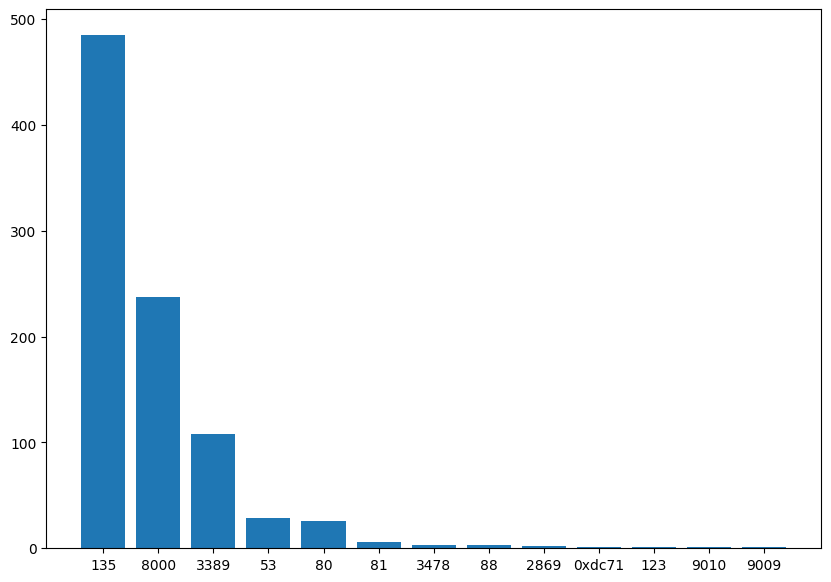

nombre de port source distincts : 753
nombre de port destination distincts : 5


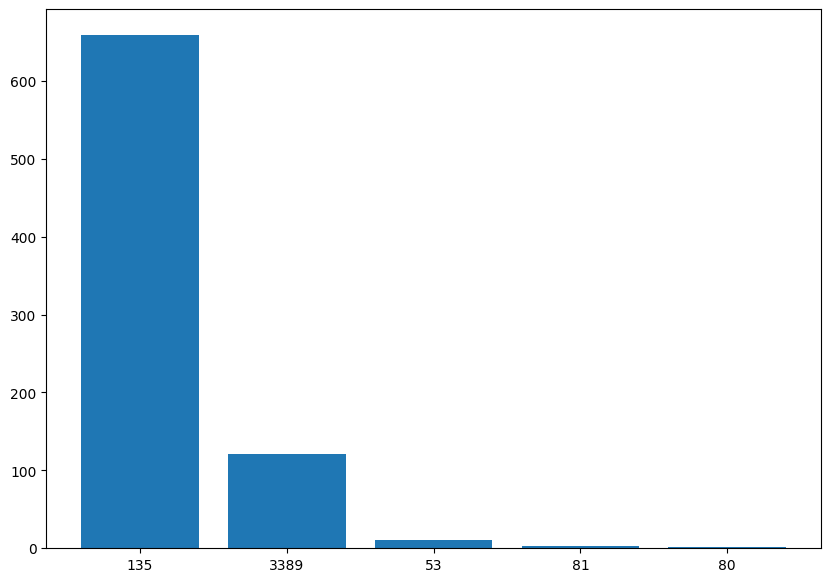

nombre de port source distincts : 1383
nombre de port destination distincts : 5


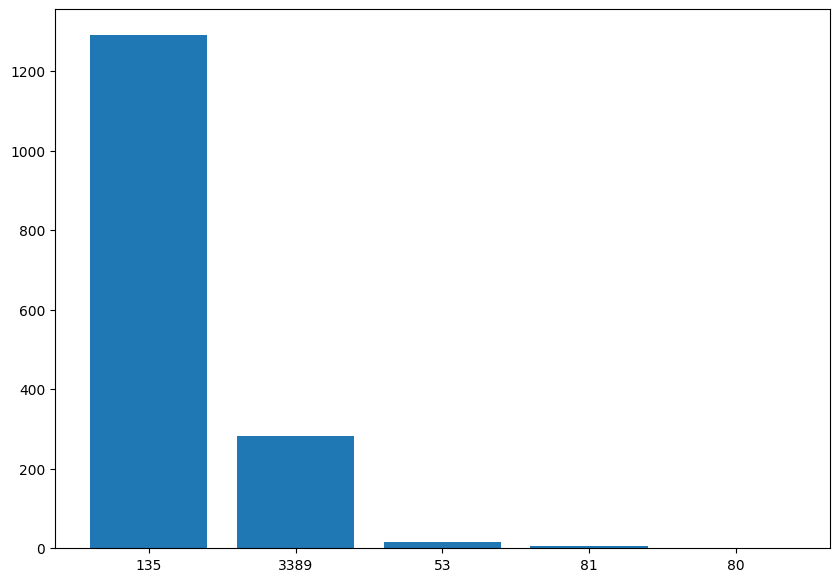

nombre de port source distincts : 1349
nombre de port destination distincts : 4


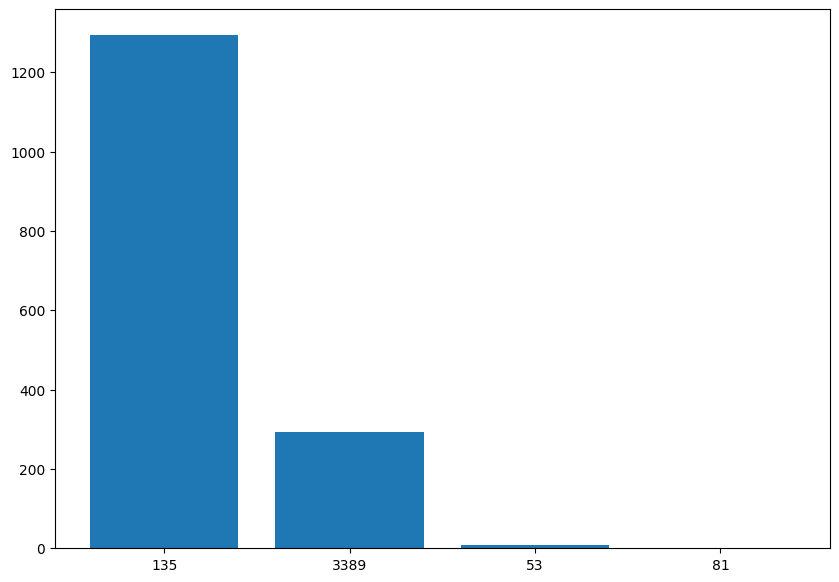

nombre de port source distincts : 1099
nombre de port destination distincts : 4


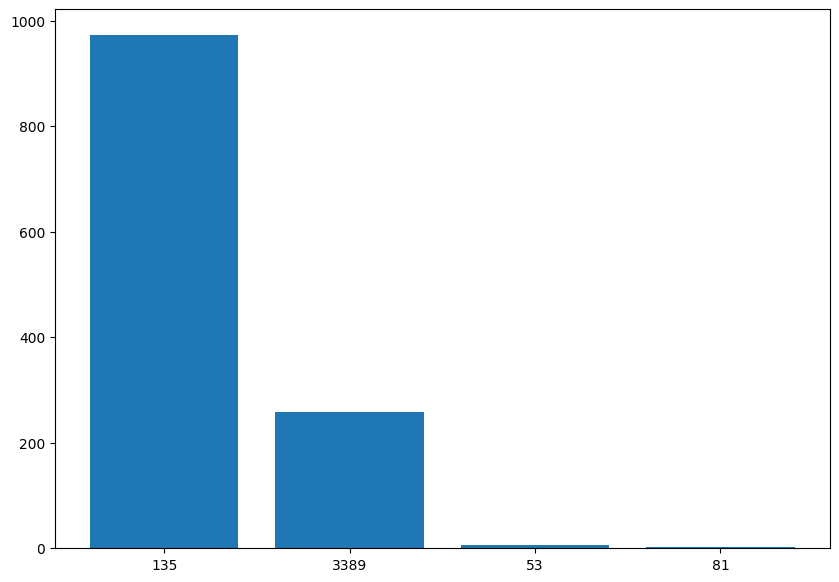

In [98]:
for df_train in list_df_train:
    df_train_botnet, df_train_normal_background = separate_botnet(df_train)
    Sport_values = get_Sport_values(df_train_botnet)
    Dport_values  = get_Dport_values(df_train_botnet)    
    #print(Sport_values)
    print(f"nombre de port source distincts : {len(Sport_values)}")
    print(f"nombre de port destination distincts : {len(Dport_values)}")
    plt.figure(figsize=(10,7))
    plt.bar(x = Dport_values.index, height=Dport_values.values, )
    plt.show()

In [103]:
for df_train in list_df_train:
    df_train_botnet, df_train_normal_background = separate_botnet(df_train)
    Sport_values = get_Sport_values(df_train_normal_background)
    Dport_values  = get_Dport_values(df_train_normal_background)
    print(f"nombre de port source distincts : {len(Sport_values)}")
    print(f"nombre de port destination distincts : {len(Dport_values)}")

nombre de port source distincts : 57385
nombre de port destination distincts : 28747
nombre de port source distincts : 60045
nombre de port destination distincts : 30877
nombre de port source distincts : 61844
nombre de port destination distincts : 30884
nombre de port source distincts : 58847
nombre de port destination distincts : 23818
nombre de port source distincts : 59356
nombre de port destination distincts : 28918


SrcAddr
147.32.84.165    4630
Name: count, dtype: int64
nombre IP source : 1, nombre IP destination 1579
nombre de port source distincts : 2790
nombre de port destination distincts : 6


<BarContainer object of 6 artists>

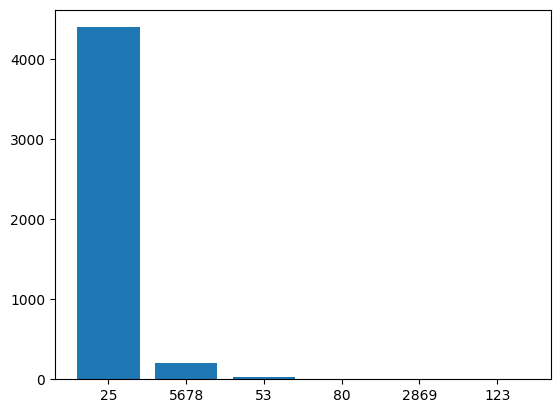

In [ ]:
df6_test_botnet, df6_test_normal_background = separate_botnet(df6_test)
source_IP_botnet, dest_IP_botnet = affichage_IP_addresses(df6_test_botnet)
print(source_IP_botnet)
print(f"nombre IP source : {len(source_IP_botnet)}, nombre IP destination {len(dest_IP_botnet)}")
Sport_values = get_Sport_values(df6_test_botnet)
Dport_values  = get_Dport_values(df6_test_botnet)
print(f"nombre de port source distincts : {len(Sport_values)}")
print(f"nombre de port destination distincts : {len(Dport_values)}")
plt.bar(x = Dport_values.index, height=Dport_values.values)


In [105]:
df_tes_botnet, df_test_normal_background = separate_botnet(df6_test)
source_IP_normal, dest_IP_normal = affichage_IP_addresses(df_test_normal_background)
print(f"nombre IP source : {len(source_IP_normal)}, nombre IP destination : {len(dest_IP_normal)}, nombre de flux: {len(df_test_normal_background)}")
Sport_values = get_Sport_values(df_test_normal_background)
Dport_values  = get_Dport_values(df_test_normal_background)
print(f"nombre de port source distincts : {len(Sport_values)}")
print(f"nombre de port destination distincts : {len(Dport_values)}")

nombre IP source : 72344, nombre IP destination : 40862, nombre de flux: 554289
nombre de port source distincts : 57515
nombre de port destination distincts : 30361


## Execuction de l'algorithme sur les 5 datasets de train avec les valeurs de paramètre par défaut du papier 

In [ ]:
for df_train in list_df_train:
    scan_bot_test = TAPS(df_train)
    print(scan_bot_test)

['147.32.86.50', '147.32.84.59', '147.32.84.165', '147.32.86.17', '147.32.84.132', '147.32.84.170', '147.32.84.123']
['147.32.86.17', '147.32.84.123', '147.32.84.165', '147.32.84.59', '147.32.84.170', '147.32.84.164', '147.32.85.76']
['147.32.84.165', '147.32.85.76', '217.195.122.126', '147.32.84.114']
['147.32.84.165', '147.32.84.138', '147.32.86.89', '147.32.85.120', '90.177.113.3']
['147.32.84.165', '147.32.86.89', '147.32.84.171', '147.32.84.164', '147.32.84.114', '92.62.224.17', '147.32.85.124', '147.32.86.148', '147.32.84.170', '147.32.84.59']


## Calcul des valeurs de performance sur les datasets de training

In [99]:
def performance(df, list_N, list_K):
    final_result = {}
    for N in list_N:
        final_result[f"N = {N}"] = {}
        for K in list_K:
            TP, FP= 0, 0
            df_botnet, df_normal_background = separate_botnet(df)
            source_IP_botnet, dest_IP_botnet = affichage_IP_addresses(df_botnet)
            source_IP_normal_background, dest_IP_normal_background = affichage_IP_addresses(df_normal_background)
            scanner_IPs = list(source_IP_botnet.index)
            normal_IPs = list(source_IP_normal_background.index)
            scan_result = TAPS(df, N, K)
            print(f"scan result : {scan_result}")
            print(f"botnet IPs : {scanner_IPs}")
            for ip in scan_result:
                if ip in scanner_IPs:
                    TP += 1
                else :
                    FP += 1
            TN = len(normal_IPs) - FP
            FN = len(scanner_IPs) - TP
            print(f"TP : {TP}, FP : {FP}, TN : {TN}, FN : {FN}")
            result = {"precision" : TP/(TP+FP), "accuracy" : (TP+TN)/(TP+TN+FP+FN), "error rate" : (FN+FP)/(TP+TN+FP+FN)}
            print(result)
            final_result[f"N = {N}"][f"K = {K}"] = result
            
    return final_result
                

In [ ]:
list_N = [5, 10, 15]
list_K = [2,3,4]
print(performance(list_df_train[3], list_N, list_K))

scan result : ['147.32.84.138', '147.32.86.89', '147.32.86.88', '147.32.86.5', '188.138.106.141', '147.32.85.120', '90.177.113.3']
botnet IPs : ['147.32.84.165']
147.32.84.138
False
147.32.86.89
False
147.32.86.88
False
147.32.86.5
False
188.138.106.141
False
147.32.85.120
False
90.177.113.3
False
TP : 0, FP : 7, TN : 93093, FN : 1
{'precision': 0.0, 'accuracy': 0.999914071814481, 'error rate': 8.592818551895253e-05}
scan result : ['147.32.84.138', '188.138.106.141', '147.32.85.120', '90.177.113.3']
botnet IPs : ['147.32.84.165']
147.32.84.138
False
188.138.106.141
False
147.32.85.120
False
90.177.113.3
False
TP : 0, FP : 4, TN : 93096, FN : 1
{'precision': 0.0, 'accuracy': 0.9999462948840506, 'error rate': 5.3705115949345335e-05}
scan result : ['147.32.84.138', '90.177.113.3']
botnet IPs : ['147.32.84.165']
147.32.84.138
False
90.177.113.3
False
TP : 0, FP : 2, TN : 93098, FN : 1
{'precision': 0.0, 'accuracy': 0.9999677769304304, 'error rate': 3.22230695696072e-05}
scan result : ['147

In [ ]:
list_N = [15,20,25]
list_K = [4,5,6]
print(performance(list_df_train[3], list_N = list_N, list_K = list_K))

scan result : ['147.32.84.165', '147.32.84.138', '147.32.85.120', '90.177.113.3']
botnet IPs : ['147.32.84.165']
TP : 1, FP : 3, TN : 93097, FN : 0
{'precision': 0.25, 'accuracy': 0.9999677769304304, 'error rate': 3.22230695696072e-05}
scan result : ['147.32.84.138', '147.32.84.165', '147.32.85.120', '90.177.113.3']
botnet IPs : ['147.32.84.165']
TP : 1, FP : 3, TN : 93097, FN : 0
{'precision': 0.25, 'accuracy': 0.9999677769304304, 'error rate': 3.22230695696072e-05}
scan result : ['147.32.84.138', '147.32.85.120', '90.177.113.3', '147.32.84.165']
botnet IPs : ['147.32.84.165']
TP : 1, FP : 3, TN : 93097, FN : 0
{'precision': 0.25, 'accuracy': 0.9999677769304304, 'error rate': 3.22230695696072e-05}
scan result : ['147.32.84.165', '147.32.84.138', '147.32.85.120', '90.177.113.3']
botnet IPs : ['147.32.84.165']
TP : 1, FP : 3, TN : 93097, FN : 0
{'precision': 0.25, 'accuracy': 0.9999677769304304, 'error rate': 3.22230695696072e-05}
scan result : ['147.32.84.165', '147.32.84.138', '147.32

In [ ]:
list_N = [5, 10, 15]
list_K = [2,3,4]
print(performance(list_df_train[0], list_N, list_K))

scan result : ['147.32.86.50', '147.32.84.59', '147.32.85.7', '147.32.84.134', '147.32.86.15', '147.32.86.168', '147.32.86.208', '147.32.85.6', '147.32.84.170', '147.32.85.114', '147.32.84.181', '147.32.84.123', '147.32.86.17']
botnet IPs : ['147.32.84.165']
TP : 0, FP : 13, TN : 73123, FN : 1
{'precision': 0.0, 'accuracy': 0.9998085784213189, 'error rate': 0.00019142157868110534}
scan result : ['147.32.84.59']
botnet IPs : ['147.32.84.165']
TP : 0, FP : 1, TN : 73135, FN : 1
{'precision': 0.0, 'accuracy': 0.9999726540601884, 'error rate': 2.7345939811586474e-05}
scan result : ['147.32.84.59']
botnet IPs : ['147.32.84.165']
TP : 0, FP : 1, TN : 73135, FN : 1
{'precision': 0.0, 'accuracy': 0.9999726540601884, 'error rate': 2.7345939811586474e-05}
scan result : ['147.32.84.164', '147.32.86.50', '147.32.86.20', '147.32.84.59', '147.32.84.168', '147.32.85.7', '147.32.86.182', '147.32.85.120', '147.32.84.165', '147.32.86.15', '147.32.85.6', '147.32.84.132', '147.32.84.123', '147.32.86.17', 

# Phase de test

## Calcul des valeurs de performance sur les datasets de test

In [100]:
list_N = [10]
list_K = [4]
print(performance(df6_test, list_N, list_K))

scan result : ['147.32.84.59', '147.32.85.123', '147.32.85.76', '147.32.84.165', '90.177.113.3', '147.32.84.166', '147.32.84.123']
botnet IPs : ['147.32.84.165']
TP : 1, FP : 6, TN : 72338, FN : 0
{'precision': 0.14285714285714285, 'accuracy': 0.9999170640680075, 'error rate': 8.293593199253576e-05}
{'N = 10': {'K = 4': {'precision': 0.14285714285714285, 'accuracy': 0.9999170640680075, 'error rate': 8.293593199253576e-05}}}
